In [1]:
import os 

#### The VGG GPU utilization 

In [1]:
VGG_CPU_4GPU_PATH = "./GPU_vgg_four_GPU.csv"
VGG_CPU_3GPU_PATH = "./GPU_vgg_three_redo_GPU.csv"
VGG_CPU_2GPU_PATH = "./GPU_vgg_two_GPU.csv"
VGG_CPU_1GPU_PATH = "./GPU_vgg_one_GPU.csv"

In [3]:
def readfile(filename):
    file1 = open(filename, 'r')
    count = 0

    while count < 10:
        line = file1.readline()
        if not line:
            break
        print(line)
        count += 1
    
    file1.close()

In [4]:
readfile(VGG_CPU_4GPU_PATH)

Number of GPUs 4

Time, device, gpu_util(%), gpu_mem(%), memory_used/total(Mib), power_current/limit(W), temperature(C), Frequency(MHz)

05:14:17.887208, 0, 0, 0, 1/11019, 9.851/250.0, 49, 300

05:14:17.896145, 1, 0, 0, 1/11019, 21.576/250.0, 50, 300

05:14:17.907868, 2, 0, 0, 1/11019, 4.242/250.0, 55, 300

05:14:17.918333, 3, 0, 0, 98/11016, 29.364/250.0, 63, 300

05:14:18.923137, 0, 0, 0, 1/11019, 9.476/250.0, 48, 300

05:14:18.925880, 1, 0, 0, 1/11019, 21.555/250.0, 50, 300

05:14:18.928938, 2, 0, 0, 1/11019, 5.311/250.0, 55, 300

05:14:18.931527, 3, 0, 0, 98/11016, 28.869/250.0, 63, 300



In [2]:
import matplotlib.pyplot as plt
def draw_GPU_Usage(filename, name):
    file1 = open(filename, 'r')
    count = 0
    gpu0_usage = []
    gpu1_usage = []
    gpu2_usage = []
    gpu3_usage = []
    while True:
        line = file1.readline()
        if not line:
            break
        count += 1
        if count > 2:
            line = line.split(',')
            usage = []
            for item in line:
                usage.append(item.split())
            if usage[1] == ['0']:
                gpu0_usage.append(int(usage[2][0]))
            if usage[1] == ['1']:
                gpu1_usage.append(int(usage[2][0]))
            if usage[1] == ['2']:
                gpu2_usage.append(int(usage[2][0]))
            if usage[1] == ['3']:
                gpu3_usage.append(int(usage[2][0]))
    file1.close()

    plt.figure(figsize=(15, 4))
    plt.plot(gpu0_usage, linewidth=1, color = 'red', label = 'gpu0')
    plt.plot(gpu1_usage, linewidth=1, color = 'blue', label = 'gpu1')
    plt.plot(gpu2_usage, linewidth=1, color = 'green', label = 'gpu2')
    plt.plot(gpu3_usage, linewidth=1, color = 'yellow', label = 'gpu3')

    plt.xlabel('Time (s)')
    plt.ylabel('GPU usage %')
    plt.legend()
    plt.savefig(name + '.png')
    plt.show()

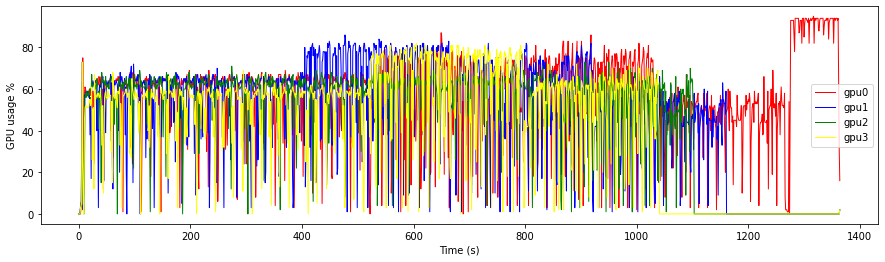

In [3]:
draw_GPU_Usage(VGG_CPU_4GPU_PATH, 'VGG_CPU_4GPU')

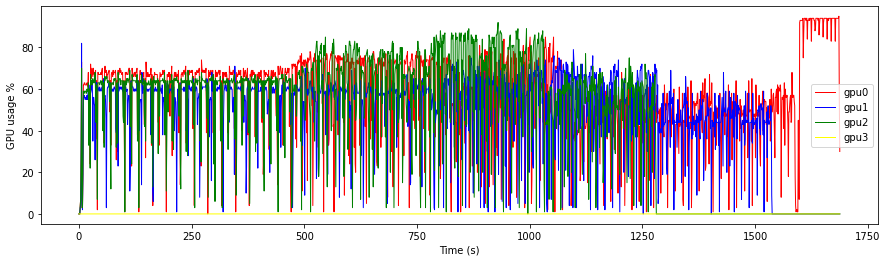

In [4]:
draw_GPU_Usage(VGG_CPU_3GPU_PATH, 'VGG_CPU_3GPU')

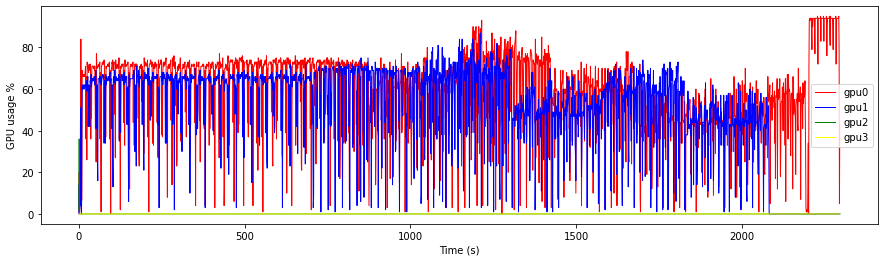

In [5]:
draw_GPU_Usage(VGG_CPU_2GPU_PATH, 'VGG_CPU_2GPU')

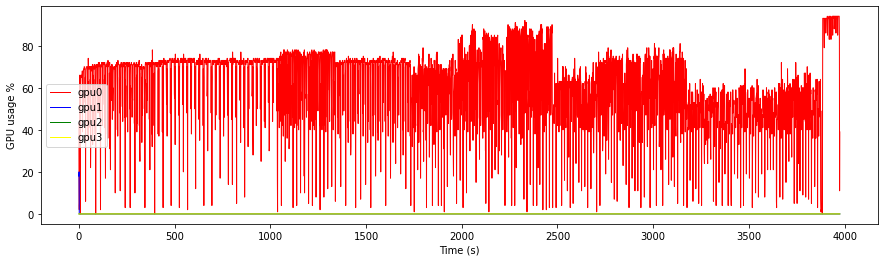

In [6]:
draw_GPU_Usage(VGG_CPU_1GPU_PATH, 'VGG_CPU_1GPU')

### GPU energy consumption 

In [11]:
def sum_GPU_Energy(filename):
    file1 = open(filename, 'r')
    count = 0

    gpu0_power_sum = 0
    gpu1_power_sum = 0
    gpu2_power_sum = 0
    gpu3_power_sum = 0

    while True:
        line = file1.readline()
        if not line:
            break
        count += 1
        if count > 2:
            line = line.split(',')
            usage = []
            for item in line:
                usage.append(item.split())

            if usage[1] == ['0']:
                power = float(usage[5][0].split('/')[0])
                gpu0_power_sum += power if power >= 0 else print(power)
            if usage[1] == ['1']:
                power = float(usage[5][0].split('/')[0])
                gpu1_power_sum += power if power >= 0 else print(power)
            if usage[1] == ['2']:
                power = float(usage[5][0].split('/')[0])
                gpu2_power_sum += power if power >= 0 else print(power)
            if usage[1] == ['3']:
                power = float(usage[5][0].split('/')[0])
                gpu3_power_sum += power if power >= 0 else print(power)       
    
    print("gpu0_power = {}".format(gpu0_power_sum))
    print("gpu1_power = {}".format(gpu1_power_sum))
    print("gpu2_power = {}".format(gpu2_power_sum))
    print("gpu3_power = {}".format(gpu3_power_sum))
    print("gpu_power = {}".format(gpu0_power_sum + gpu1_power_sum + gpu2_power_sum + gpu3_power_sum))
    file1.close()

In [12]:
sum_GPU_Energy(VGG_CPU_4GPU_PATH)

gpu0_power = 218285.59999999995
gpu1_power = 187916.2570000001
gpu2_power = 148932.24300000005
gpu3_power = 154058.17300000007
gpu_power = 709192.2730000002


In [13]:
sum_GPU_Energy(VGG_CPU_3GPU_PATH)

gpu0_power = 266412.7109999999
gpu1_power = 215387.32199999937
gpu2_power = 204806.15000000034
gpu3_power = 42456.036999999946
gpu_power = 729062.2199999995


In [14]:
sum_GPU_Energy(VGG_CPU_2GPU_PATH)

gpu0_power = 360968.84900000016
gpu1_power = 303502.8200000003
gpu2_power = 11736.178000000004
gpu3_power = 54479.34699999991
gpu_power = 730687.1940000004


In [15]:
sum_GPU_Energy(VGG_CPU_1GPU_PATH)

gpu0_power = 633624.7030000009
gpu1_power = 74587.09500000003
gpu2_power = 13641.814000000008
gpu3_power = 93892.06999999995
gpu_power = 815745.6820000008
